# Chicago General Transit Feed Specification (GTFS)

The General Transit Feed Specification—or GTFS—is an open format for packaging scheduled service data. GTFS data is produced by hundreds of transit agencies around the world to deliver content for inclusion in maps and directions-giving services, including Google Maps.

### Set up and Load the GTFS data in Chicago

In [7]:
#show Chicago GTFS data
import requests
import shutil
import os
import zipfile

req = requests.get('http://gtfs.s3.amazonaws.com/chicago-transit-authority_20160416_0123.zip', stream=True)
with open('chicago-transit-authority_20160416_0123.zip', 'wb') as file:
    shutil.copyfileobj(req.raw, file)
    
if not os.path.exists('./gtfsdata'):
    os.mkdir('./gtfsdata')
    
with zipfile.ZipFile('chicago-transit-authority_20160416_0123.zip', 'r') as file:
    file.extractall('./gtfsdata')

os.listdir('./gtfsdata')

['developers_license_agreement.htm',
 'trips.txt',
 'stop_times.txt',
 'transfers.txt',
 'stops.txt',
 'shapes.txt',
 'frequencies.txt',
 'routes.txt',
 'agency.txt',
 'calendar.txt',
 'calendar_dates.txt']

### Examples of the GTFS trips data and shapes data

In [2]:
import pandas as pd

trips = pd.read_csv('gtfsdata/trips.txt', low_memory=False)
shapes = pd.read_csv('gtfsdata/shapes.txt', low_memory=False)
trips.head(10)

,route_id,service_id,trip_id,direction_id,block_id,shape_id,direction,wheelchair_accessible,schd_trip_id
0,1,46301,463099545089,0,463000002420,4636351,South,1,99545089
1,1,46301,463099545091,1,463000002422,4636353,North,1,99545091
2,1,46301,463099545103,1,463000002420,4636353,North,1,99545103
3,1,46301,463099545105,0,463000002434,4636351,South,1,99545105
4,1,46301,463099545106,0,463000002422,4636351,South,1,99545106
5,1,46301,463099545113,1,463000002440,4636353,North,1,99545113
6,1,46301,463099545117,0,463000002442,4636351,South,1,99545117
7,1,46301,463099545428,0,463000002526,4636351,South,1,99545428
8,1,46301,463099545534,1,463000002547,4636353,North,1,99545534
9,1,46301,463099545601,0,463000002567,4636351,South,1,99545601


In [3]:
shapes.head(10)

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,19,41.886827,-87.626902,1,0
1,19,41.886827,-87.626902,2,66
2,19,41.886793,-87.624648,3,504
3,19,41.885150,-87.624552,4,1110
4,19,41.885048,-87.624544,5,1167
5,19,41.883483,-87.624534,6,1708
6,19,41.883332,-87.624530,7,1770
7,19,41.882163,-87.624479,8,2477
8,19,41.882116,-87.625919,9,2556
9,19,41.882116,-87.626062,10,2623


### Distributions of latitude and longitude for Chicago GTFS dataset

Text(0, 0.5, 'Frequency')

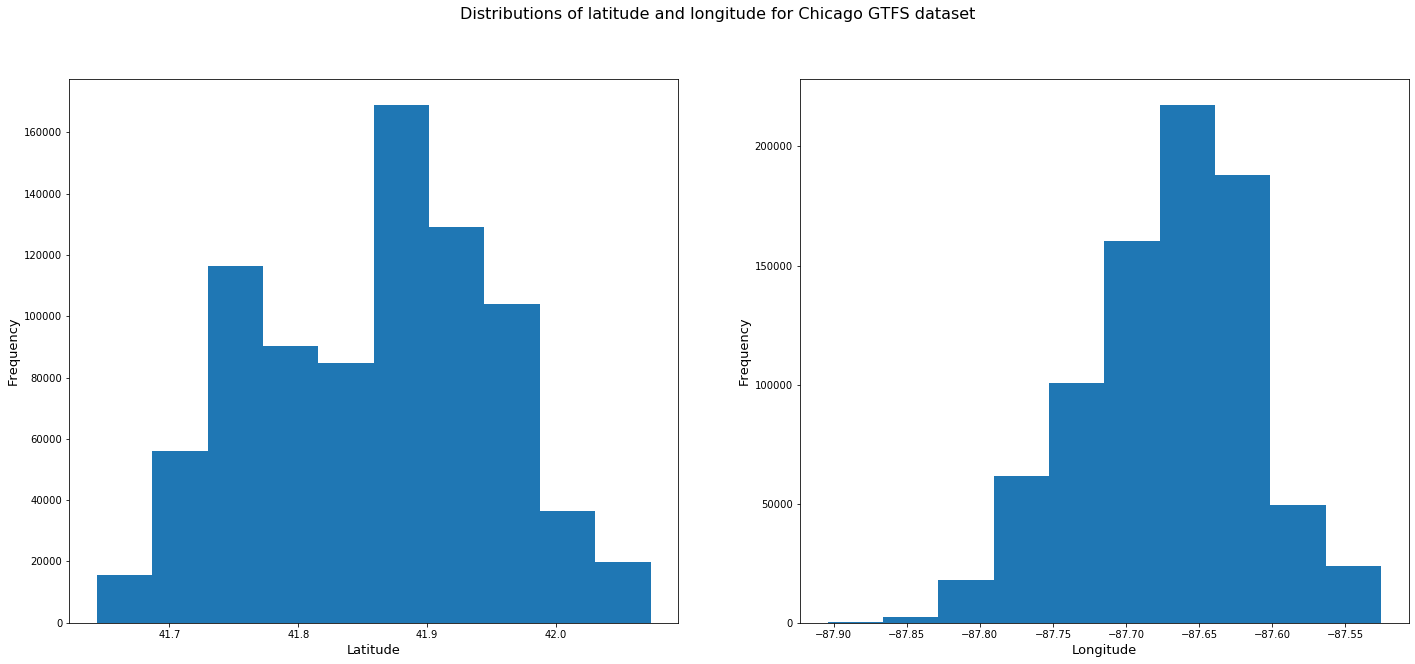

In [4]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))
fig.suptitle('Distributions of latitude and longitude for Chicago GTFS dataset', fontsize=16)
ax1.hist(shapes.shape_pt_lat)
ax1.set_xlabel('Latitude', fontsize=13)
ax1.set_ylabel('Frequency', fontsize=13)
ax2.hist(shapes.shape_pt_lon)
ax2.set_xlabel('Longitude', fontsize=13)
ax2.set_ylabel('Frequency', fontsize=13)

### Heatmap for GTFS data in Chicago area

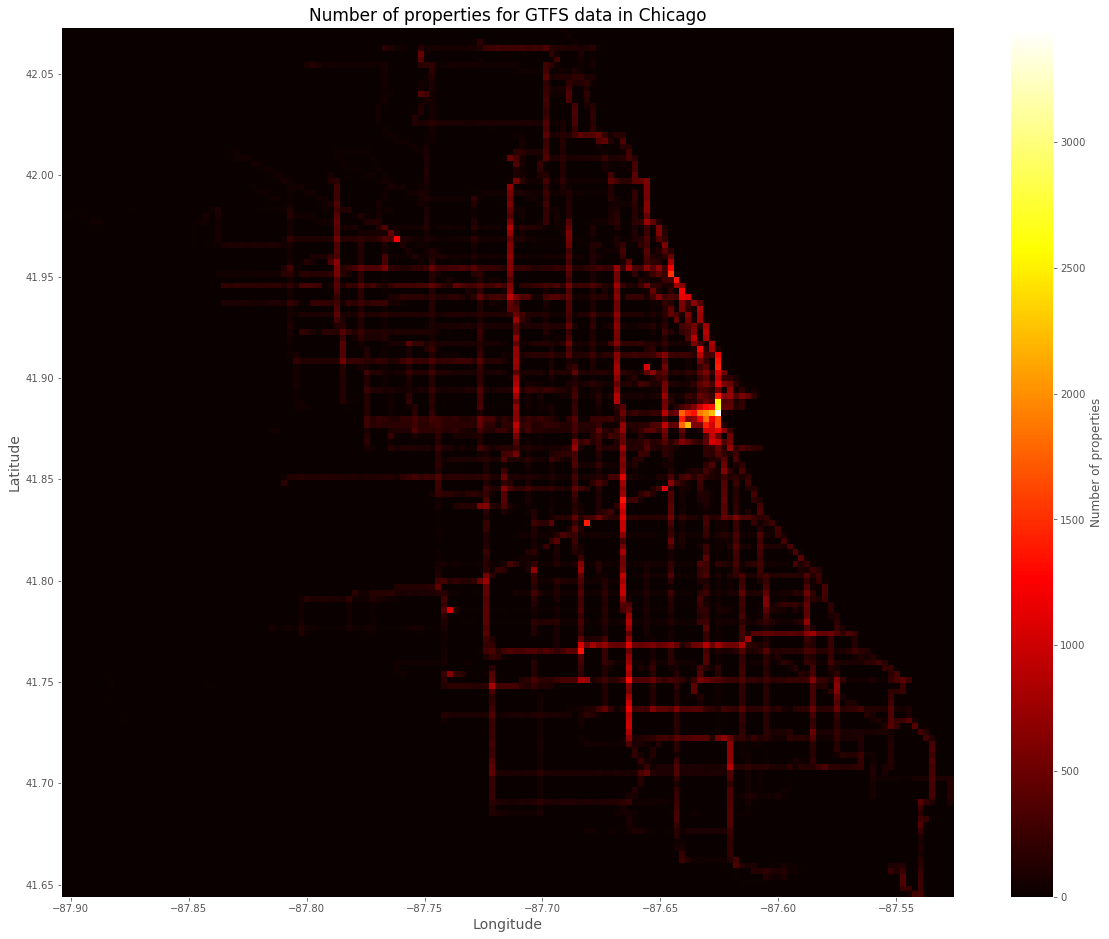

In [8]:
#Heatmap for the GTFS data in Chicago
import matplotlib.pyplot as plt

plt.figure(figsize = (20,16))
plt.hist2d(shapes.shape_pt_lon, shapes.shape_pt_lat, bins=150, cmap='hot')
plt.colorbar().set_label('Number of properties')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('Number of properties for GTFS data in Chicago', fontsize=17)

plt.show()

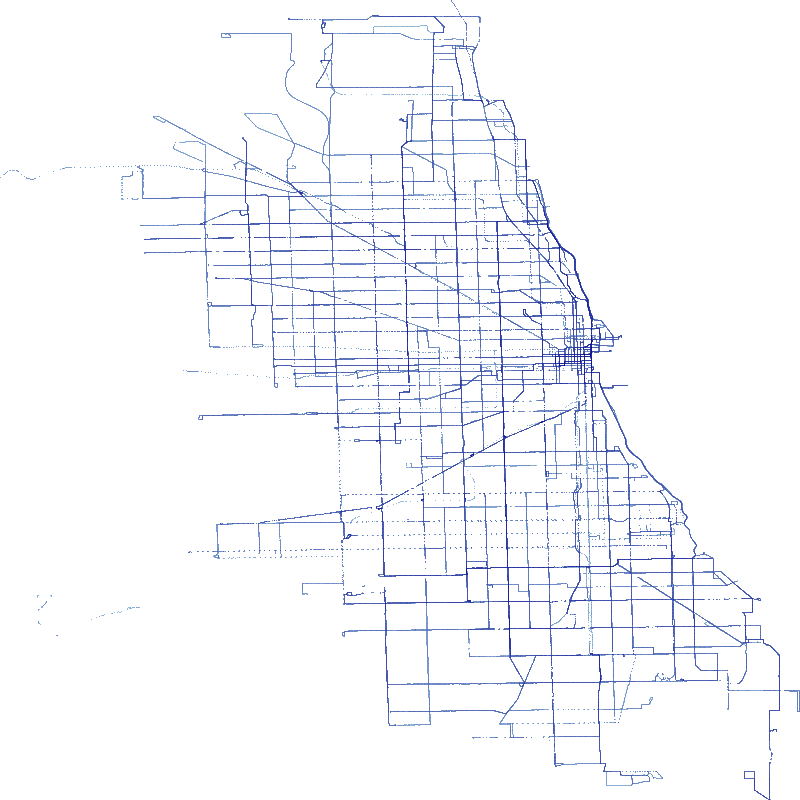

In [6]:
from __future__ import division 
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.style.use('ggplot')
import os
import glob
import datashader as ds
import datashader.transfer_functions as tf

import folium

# Show GTFS data in Chicago

#maindt = shapes[abs(shapes.shape_pt_lon +87.6298) <= 0.95]
#maindt = maindt[abs(maindt.shape_pt_lat -41.8781 ) <= 0.95]
cvs = ds.Canvas(plot_width=800, plot_height=800)
agg = cvs.points(shapes,'shape_pt_lon','shape_pt_lat')
img = tf.shade(agg, cmap=['lightblue','darkblue'],how='log')
img